### Sample program for calculating accuracy measures and plotting ROC / PR curve

#### Import libraries  

In [8]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, matthews_corrcoef

#### Parameters  

In [9]:
csv_in = 'class_pre3.csv'

#### CSV file  

In [10]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(100, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   100 non-null    int64  
 1   A       100 non-null    float64
 2   B       100 non-null    float64
 3   C       100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB
None


,label,A,B,C
0,0,0.345066,0.115360,0.456917
1,0,0.419649,0.365812,0.390605
2,1,0.689613,0.925082,0.916245
3,0,0.636881,0.016503,0.420523
4,1,0.509998,0.665024,0.543389


#### Confusing matrix (混同行列) and measurements for prediction accuracy for each method  

In [17]:
print('A')
print('precision:', precision_score(df['label'], df['A']>=0.4))
print('recall:', recall_score(df['label'], df['A']>=0.4))
print('accuracy(Q2):', accuracy_score(df['label'], df['A']>=0.4))
print('f1:', f1_score(df['label'], df['A']>=0.4))
print('matthews:', matthews_corrcoef(df['label'], df['A']>=0.4))
predA = df['A'].map(lambda x: 1 if x >= 0.4 else 0)
ctA = pd.crosstab(df['label'], predA)
fpA = ctA.loc[0,1]
tnA = ctA.loc[0,0]
print('false positive rate:', fpA/(fpA+tnA))
display(ctA)

A
precision: 0.3442622950819672
recall: 0.8076923076923077
accuracy(Q2): 0.55
f1: 0.4827586206896552
matthews: 0.24024998217887925
false positive rate: 0.5405405405405406


A,0,1
label,,
0,34,40
1,5,21


In [18]:
print('B')
print('precision:', precision_score(df['label'], df['B']>=0.4))
print('recall:', recall_score(df['label'], df['B']>=0.4))
print('accuracy(Q2):', accuracy_score(df['label'], df['B']>=0.4))
print('f1:', f1_score(df['label'], df['B']>=0.4))
print('matthews:', matthews_corrcoef(df['label'], df['B']>=0.4))
predB = df['B'].map(lambda x: 1 if x >= 0.4 else 0)
ctB = pd.crosstab(df['label'], predB)
fpB = ctB.loc[0,1]
tpB = ctB.loc[1,1]
tnB = ctB.loc[0,0]
print('false positive rate:', fpB/(fpB+tnB))
print('true positive rate:', tpB / 100)
print('specificity:', tnB/(fpB+tnB))

B
precision: 0.5365853658536586
recall: 0.8461538461538461
accuracy(Q2): 0.77
f1: 0.6567164179104478
matthews: 0.5256450590867675
false positive rate: 0.25675675675675674
true positive rate: 0.22
specificity: 0.7432432432432432


In [13]:
print('C')
print('precision:', precision_score(df['label'], df['C']>=0.5))
print('recall:', recall_score(df['label'], df['C']>=0.5))
print('accuracy(Q2):', accuracy_score(df['label'], df['C']>=0.5))
print('f1:', f1_score(df['label'], df['C']>=0.5))
print('matthews:', matthews_corrcoef(df['label'], df['C']>=0.5))
predC = df['C'].map(lambda x: 1 if x >= 0.5 else 0)
ctC = pd.crosstab(df['label'], predC)
fpC = ctC.loc[0,1]
tnC = ctC.loc[0,0]
print('false positive rate:', fpC/(fpC+tnC))

C
precision: 0.5348837209302325
recall: 0.8846153846153846
accuracy(Q2): 0.77
f1: 0.6666666666666665
matthews: 0.5443062073039762
false positive rate: 0.2702702702702703


#### PR curve and its AUC for each method  

In [14]:
y_true = df['label']
y_scoreA = df['A']
precisionA, recallA, thresholdsA = precision_recall_curve(y_true, y_scoreA)
print('PR-AUC(A):', auc(recallA, precisionA))
y_scoreB = df['B']
precisionB, recallB, thresholdsB = precision_recall_curve(y_true, y_scoreB)
print('PR-AUC(B):', auc(recallB, precisionB))
y_scoreC = df['C']
precisionC, recallC, thresholdsC = precision_recall_curve(y_true, y_scoreC)
print('PR-AUC(C):', auc(recallC, precisionC))

PR-AUC(A): 0.42520372915574955
PR-AUC(B): 0.7257939526027398
PR-AUC(C): 0.6737254111840169


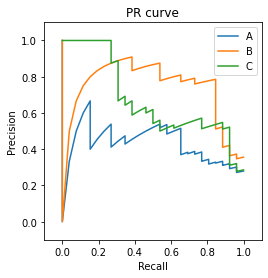

In [15]:
plt.plot(recallA, precisionA, label='A')
plt.plot(recallB, precisionB, label='B')
plt.plot(recallC, precisionC, label='C')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

#### (Accuracy around high score predictions to see the meaning of PR curves)  
accuracy: B > A > C (this corresponds to PR-AUC)  

In [16]:
display(df[['label','A']].sort_values(by='A', ascending=False).head())
display(df[['label','B']].sort_values(by='B', ascending=False).head())
display(df[['label','C']].sort_values(by='C', ascending=False).head())

,label,A
64,0,0.996954
8,0,0.980202
87,1,0.944808
88,1,0.927787
61,1,0.926016


,label,B
41,0,0.991864
68,1,0.991634
74,1,0.967813
91,1,0.959870
86,1,0.934083


,label,C
70,1,0.981400
68,1,0.961010
42,1,0.956794
61,1,0.954833
87,1,0.946145
